In [2]:
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
import numpy as np

df = pd.read_csv("./laptops_10.csv")
df.head(5)

,Company,Product,TypeName,Inches,Cpu,Ram,Gpu,OpSys,Weight,Price_euros,Cpu_Company,Memory_Amount,Memory_Type
0,Apple,MacBook Pro,Ultrabook,13.3,Intel Core i5 2.3GHz,8GB,Intel Iris Plus Graphics 640,macOS,1.37,1339.69,Intel,128,SSD
1,Apple,Macbook Air,Ultrabook,13.3,Intel Core i5 1.8GHz,8GB,Intel HD Graphics 6000,macOS,1.34,898.94,Intel,128,FlashStorage
2,HP,250 G6,Notebook,15.6,Intel Core i5 7200U 2.5GHz,8GB,Intel HD Graphics 620,No OS,1.86,575.00,Intel,256,SSD
3,Apple,MacBook Pro,Ultrabook,15.4,Intel Core i7 2.7GHz,16GB,AMD Radeon Pro 455,macOS,1.83,2537.45,Intel,512,SSD
4,Apple,MacBook Pro,Ultrabook,13.3,Intel Core i5 3.1GHz,8GB,Intel Iris Plus Graphics 650,macOS,1.37,1803.60,Intel,256,SSD


1.1 Изучите распределение количества памяти (Memory_Amount) с помощью matplotlib
1.2 Изучите распределение стоимости ноутбуков (Price_euros) с помощью matplotlib
1.3 Изучите распределение веса ноутбуков (Weight) с помощью matplotlib
🌟 Постройте график
🌟 Назовите график
🌟 Сделайте именование оси x и оси y
🌟 Сделайте выводы


In [3]:
data1 = df["Memory_Amount"].value_counts().reset_index()

data1["index"] = data1["index"].apply(str)



Text(0, 0.5, 'Кол-во моделей')

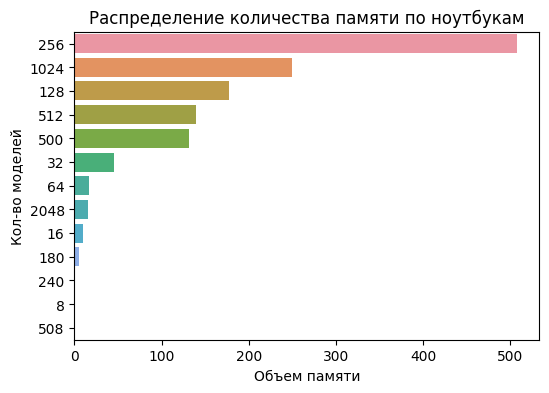

In [10]:
plt.figure(figsize=(6,4))
sns.barplot(x=data1["Memory_Amount"],y=data1["index"])

plt.title("Распределение количества памяти по ноутбукам")
plt.xlabel("Объем памяти")
plt.ylabel("Кол-во моделей")
plt.boxplot()

Задание 2.
2.1 Изучите распределение типов носителя (Memory_Type)
2.2 Изучите распределение компаний производителей (Company)
2.3 Изучите распределение операционной системы (OpSys)
2.4 Изучите распределение компаний производителей CPU (Cpu_Company)
🌟 Постройте график
🌟 Сделайте выводы


Задание 3.
Изучите взаимосвязь компаний производителей ноутбуков и компаний производителей процессоров, используя сложенную или многорядовую столбчатую диаграмму
Процессоры от Samsung не изучайте
3.1 Постройте график в абсолютных величинах 3.2 Постройте график в относительных величинах


In [30]:
cpus = pd.crosstab(df['Company'],df['Cpu_Company'],normalize='index').reset_index()
cpus.drop(columns=['Samsung'],inplace=True)
cpus


Cpu_Company,Company,AMD,Intel
0,Acer,0.097087,0.902913
1,Apple,0.000000,1.000000
2,Asus,0.069620,0.930380
3,Chuwi,0.000000,1.000000
4,Dell,0.000000,1.000000
5,Fujitsu,0.000000,1.000000
6,Google,0.000000,1.000000
7,HP,0.091241,0.908759
8,Huawei,0.000000,1.000000
9,LG,0.000000,1.000000


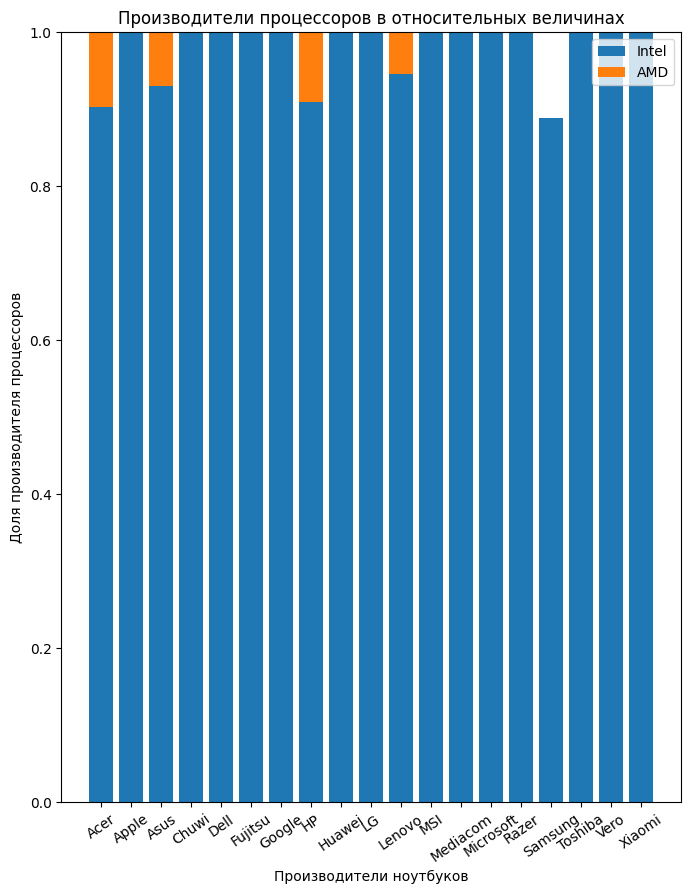

In [34]:
plt.figure(figsize=(8,10))

plt.bar(cpus['Company'],cpus['Intel'])
plt.bar(cpus['Company'],cpus['AMD'],bottom=cpus['Intel'])
plt.xticks(rotation=35);
plt.xlabel("Производители ноутбуков")
plt.ylabel("Доля производителя процессоров")
plt.title("Производители процессоров в относительных величинах")
plt.legend(['Intel','AMD']);

Задание 4.
4.1 Изучите взаимосвязь стоимости ноутбука и компании производителя процессора
🌟 Постройте график
🌟 Назовите график
🌟 Сделайте именование оси x и оси y
🌟 Сделайте выводы


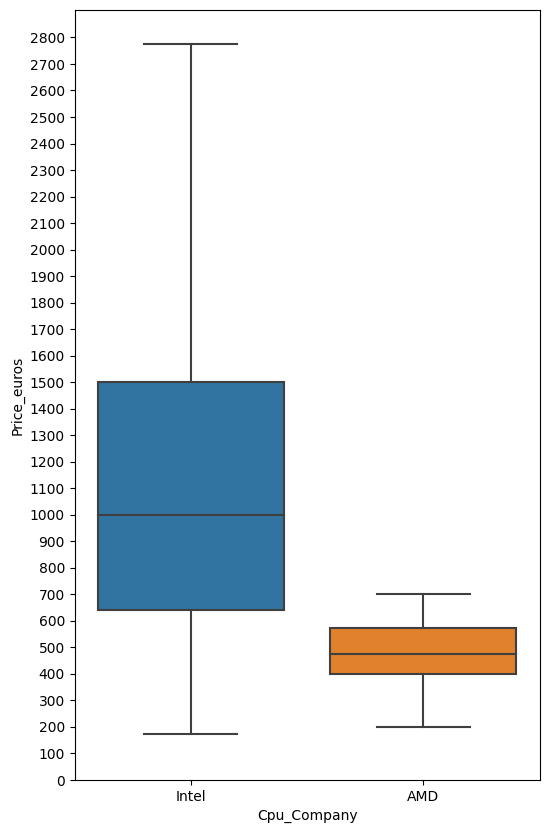

In [42]:
plt.figure(figsize=(6,10))
sns.boxplot(x = df[df['Cpu_Company'] !='Samsung']["Cpu_Company"],y = df['Price_euros'], whis=1.5, showfliers=False);
plt.yticks(np.arange(2801,step=100));